In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import sklearn.metrics
import math
from numpy.linalg import eig
from numpy.linalg import svd

**Matrix Factorization with User Ratings**

The "UsersRestaurantRatings" file has been altered in the following ways in "UsersRestaurantRatingsNew":
1. A new column, "userIDnum" has been created, which strips the excess characters from the "userID" column to isolate the user ID as an integer.
2. The "rating," "food_rating," and "service_rating" columns' values have all been increased by 1. Now, instead of the user ratings being either 0, 1, or 2 for each restaurant, they will be 1, 2, or 3. This will help when it comes to creating the user-restaurant ratings matrix.
3. The data has been sorted, first in order of increasing userID and then in order of increasing placeID.

In [2]:
# load the altered user ratings dataset
user_ratings_df = pd.read_csv('UsersRestaurantRatingsNew.csv')
user_ratings_df.head()

,userID,userIDnum,placeID,rating,food_rating,service_rating
0,U1001,1,132825,3,3,2
1,U1001,1,132830,2,2,2
2,U1001,1,135025,3,3,3
3,U1001,1,135033,2,2,2
4,U1001,1,135039,2,2,2


In [3]:
# there are 6 columns and 1161 total ratings in this dataset
user_ratings_df.shape

(1161, 6)

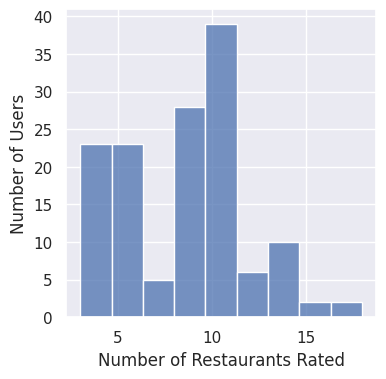

In [4]:
# look at how many restaurants each user rated
userRatings = pd.value_counts(user_ratings_df['userID'])
fig, ax = plt.subplots(figsize=(4,4))
sns.histplot(data=userRatings)
ax.set_xlabel("Number of Restaurants Rated")
ax.set_ylabel("Number of Users")
plt.show()

In [5]:
np.sort(userRatings)

array([ 3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12,
       12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 15, 16,
       18, 18])

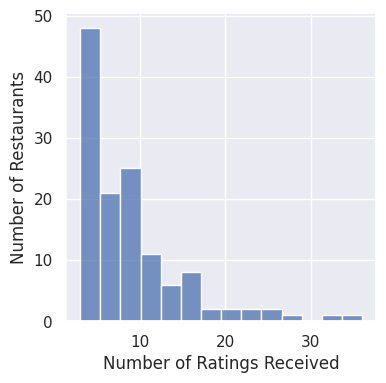

In [6]:
# look at how many ratings each restaurant got
restaurantRatings = pd.value_counts(user_ratings_df['placeID'])
fig, ax = plt.subplots(figsize=(4,4))
sns.histplot(data=restaurantRatings)
ax.set_xlabel("Number of Ratings Received")
ax.set_ylabel("Number of Restaurants")
plt.show()

In [7]:
np.sort(restaurantRatings)

array([ 3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,
        7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,
        9,  9, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 12, 12, 12, 12,
       12, 12, 12, 13, 13, 13, 13, 14, 14, 15, 15, 15, 15, 17, 17, 17, 17,
       18, 18, 20, 21, 22, 24, 25, 25, 28, 32, 36])

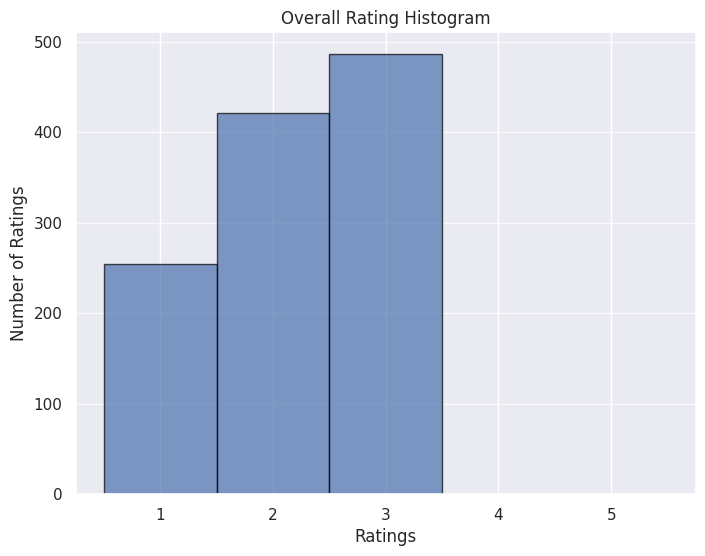

In [ ]:
# make a histogram to show rating distribution
# Histogram for 'rating'
plt.figure(figsize=(8, 6))
plt.hist(user_ratings_df['rating'], bins=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5], edgecolor='black', alpha=0.7)
plt.title('Overall Rating Histogram')
plt.xlabel('Ratings')
plt.ylabel('Number of Ratings')
plt.xticks(range(1, 6))
plt.grid(axis='y', alpha=0.75)
plt.savefig('Overall_Rating_Histogram.png', dpi=300, bbox_inches='tight')
plt.show()

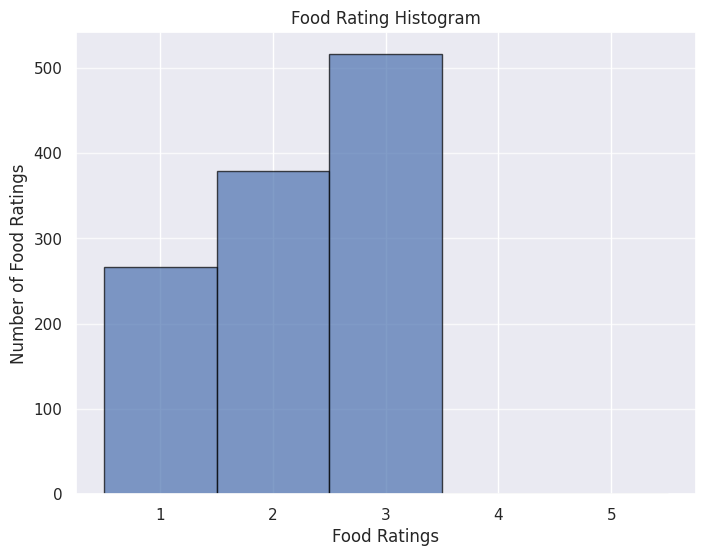

In [ ]:
# Histogram for 'food_rating'
plt.figure(figsize=(8, 6))
plt.hist(user_ratings_df['food_rating'], bins=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5], edgecolor='black', alpha=0.7)
plt.title('Food Rating Histogram')
plt.xlabel('Food Ratings')
plt.ylabel('Number of Food Ratings')
plt.xticks(range(1, 6))
plt.grid(axis='y', alpha=0.75)
plt.savefig('Food_Rating_Histogram.png', dpi=300, bbox_inches='tight')
plt.show()

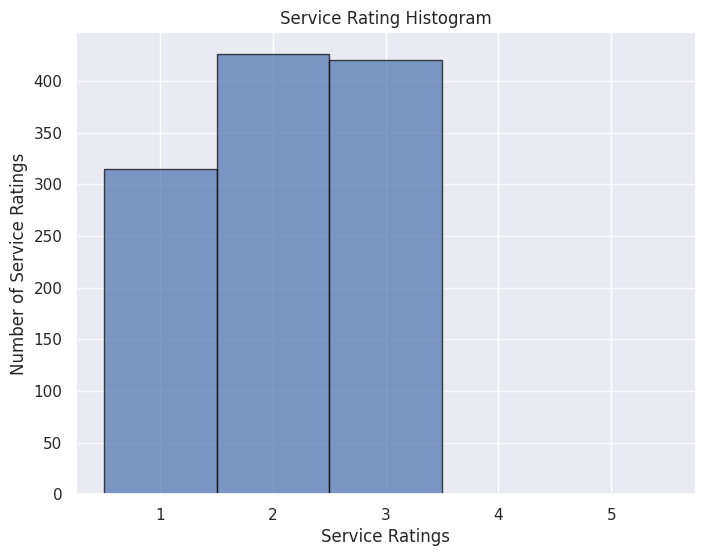

In [ ]:
# Histogram for 'service_rating'
plt.figure(figsize=(8, 6))
plt.hist(user_ratings_df['service_rating'], bins=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5], edgecolor='black', alpha=0.7)
plt.title('Service Rating Histogram')
plt.xlabel('Service Ratings')
plt.ylabel('Number of Service Ratings')
plt.xticks(range(1, 6))
plt.grid(axis='y', alpha=0.75)
plt.savefig('Service_Rating_Histogram.png', dpi=300, bbox_inches='tight')
plt.show()

In [8]:
# there are 138 unique users and 130 unique restaurants in this dataset
print(user_ratings_df['userID'].nunique())
print(user_ratings_df['placeID'].nunique())

138
130


In [9]:
# so our matrix where each user has a row and each restaurant has a column
# will have 17940 total elements
138*130

17940

In [10]:
# sparsity of matrix
1161/17940

0.06471571906354515

**Load in the Matrix and Factorize**

In [11]:
ratings = pd.read_csv('UserRestaurantRatingsMatrix.csv', header=None)

In [12]:
ratings.head()

,0,1,2,3,4,5,6,7,8,9,...,120,121,122,123,124,125,126,127,128,129
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,2,0,0
2,0,0,0,0,0,0,0,0,0,0,...,3,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
ratings = ratings.to_numpy()

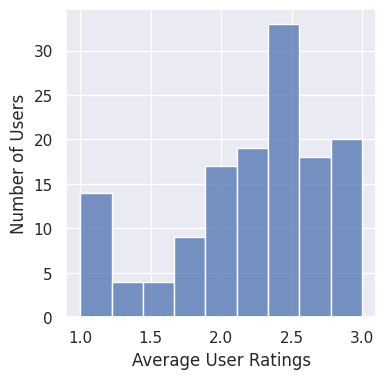

In [14]:
# calculate each user's average rating, then plot the spread
userAverages = list()
for user in range(1,139):
  userAverages.append(sum(ratings[user-1,0:129])/sum(ratings[user-1,0:129]!=0))
fig, ax = plt.subplots(figsize=(4,4))
sns.histplot(data=userAverages)
ax.set_xlabel("Average User Ratings")
ax.set_ylabel("Number of Users")
plt.show()

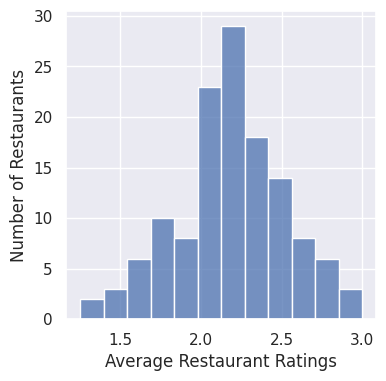

In [15]:
# calculate each restaurant's average rating, then plot the spread
restAverages = list()
for rest in range(0,130):
  restAverages.append(sum(ratings[0:137,rest])/sum(ratings[0:137,rest]!=0))
fig, ax = plt.subplots(figsize=(4,4))
sns.histplot(data=restAverages)
ax.set_xlabel("Average Restaurant Ratings")
ax.set_ylabel("Number of Restaurants")
plt.show()

In [16]:
# get the eigenvalues and eigenvectors from the ratings matrix
eigenvals, rtreigenvects = eig(ratings.T@ratings)

In [17]:
# sort the eigenvalues from biggest to smallest
eigenvals = np.sort(eigenvals)[::-1]
# we need the first 51 eigenvalues to get 90% of their total sum
eigenvalsum = sum(eigenvals)
sum(eigenvals[0:51])/eigenvalsum

0.9038170108807015

In [18]:
# use this function for the decomposition
U, d, V = svd(ratings)
print(U.shape)
print(d.shape)
print(V.shape)

(138, 138)
(130,)
(130, 130)


In [31]:
singValSum = 0
for i in range(0,51):
  singValSum = singValSum + d[i]*d[i]
#print(singValSum)
d2 = d*d
singValSum/np.sum(d2)

5704.892972678993


0.9038170108807023

In [32]:
# only keep the first 51 columns for U
U = U[0:138,0:51]
# only keep the first 51 eigenvalues for D
d = d[0:51]
# only keep the first 51 rows for V
V = V[0:51,0:130]
print(U.shape)
print(d.shape)
print(V.shape)

(138, 51)
(51,)
(51, 130)


In [33]:
# make d into a matrix where the eigenvalues are on the diagonal
d = np.diag(d)
print(d.shape)

(51, 51)


In [34]:
# multiply U, d, and V together to get a 138x130 matrix approximating the original
ratingsPredicted = U@d@V
print(ratingsPredicted.shape)

(138, 130)


In [ ]:
# evaluate how closely the predictions match the actual ratings
rmse = math.sqrt(sklearn.metrics.mean_squared_error(ratings, ratingsPredicted))
print(rmse)

0.1839591569413596


In [35]:
# find out which restaurant that each user hasn't been to yet was predicted to have the highest rating
maxRatings = [] # store list of highest predicted ratings for each user
maxIndices = [] # store list of recommended restaurants for each user
# loop through each user
for user in range(0,138):
  maxRating = 0 # store the user's highest predicted rating for a restaurant
  maxIndex = 0 # store the index of the user's highest predicted restaurant
  # loop through each restaurant for that user
  for rest in range(0,130):
    # if the predicted rating is high and the user hasn't rated that restaurant
    if(ratingsPredicted[user,rest]>maxRating and ratings[user,rest]==0):
      # store the rating of that restaurant and which restaurant it is
      maxRating = ratingsPredicted[user,rest]
      maxIndex = rest
  # add that user's maximum predicted rating and recommended restaurant to lists
  maxRatings.append(maxRating)
  maxIndices.append(maxIndex)
# print the list of restaurants that were recommended to each user
print(maxIndices)

[102, 55, 49, 50, 85, 120, 21, 45, 120, 25, 23, 64, 121, 128, 128, 87, 74, 112, 110, 64, 2, 99, 2, 39, 112, 2, 52, 6, 53, 30, 24, 99, 89, 41, 71, 120, 48, 83, 18, 28, 65, 68, 14, 129, 77, 99, 117, 90, 39, 126, 72, 100, 96, 115, 32, 89, 111, 121, 120, 19, 108, 103, 7, 107, 2, 60, 9, 16, 38, 11, 81, 72, 117, 65, 81, 53, 93, 118, 4, 8, 121, 126, 105, 82, 77, 53, 17, 85, 94, 54, 21, 32, 67, 121, 116, 83, 109, 104, 96, 30, 105, 34, 6, 99, 43, 99, 126, 120, 105, 73, 100, 58, 116, 82, 121, 81, 4, 59, 60, 38, 70, 93, 13, 122, 102, 122, 69, 52, 10, 15, 111, 121, 4, 99, 46, 82, 47, 54]


In [36]:
# print the list of recommended restaurant IDs
restaurants = np.unique(user_ratings_df['placeID'])
print(restaurants[maxIndices])

[135057 132951 132884 132885 135039 135080 132723 132870 135080 132754
 132733 134992 135081 135108 135108 135041 135021 135070 135066 134992
 132564 135053 132564 132856 135070 132564 132922 132594 132925 132773
 132740 135053 135043 132861 135016 135080 132877 135035 132706 132767
 134996 135001 132663 135109 135027 135053 135075 135044 132856 135104
 135018 135054 135050 135073 132830 135043 135069 135081 135080 132715
 135064 135058 132608 135063 132564 134976 132613 132667 132854 132630
 135033 135018 135075 134996 135033 132925 135047 135076 132583 132609
 135081 135104 135060 135034 135027 132925 132668 135039 135048 132937
 132723 132830 135000 135081 135074 135035 135065 135059 135050 132773
 135060 132845 132594 135053 132866 135053 135104 135080 135060 135019
 135054 132958 135074 135034 135081 135033 132583 134975 134976 132854
 135013 135047 132660 135082 135057 135082 135011 132922 132626 132665
 135069 135081 132583 135053 132872 135034 132875 132937]


In [37]:
# look at which restaurants were recommended the most
np.unique(restaurants[maxIndices], return_counts=True)

(array([132564, 132583, 132594, 132608, 132609, 132613, 132626, 132630,
        132660, 132663, 132665, 132667, 132668, 132706, 132715, 132723,
        132733, 132740, 132754, 132767, 132773, 132830, 132845, 132854,
        132856, 132861, 132866, 132870, 132872, 132875, 132877, 132884,
        132885, 132922, 132925, 132937, 132951, 132958, 134975, 134976,
        134992, 134996, 135000, 135001, 135011, 135013, 135016, 135018,
        135019, 135021, 135027, 135033, 135034, 135035, 135039, 135041,
        135043, 135044, 135047, 135048, 135050, 135053, 135054, 135057,
        135058, 135059, 135060, 135063, 135064, 135065, 135066, 135069,
        135070, 135073, 135074, 135075, 135076, 135080, 135081, 135082,
        135104, 135108, 135109]),
 array([4, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2,
        1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 2, 1, 1, 1, 2, 2, 2, 1, 1,
        1, 1, 1, 2, 1, 1, 2, 3, 3, 2, 2, 1, 2, 1, 2, 1, 2, 6, 2, 2, 1, 1,
        3, 1, 1, 1, 1, 2

In [38]:
# make a dataframe where placeIDs are first column and second column is how many people got rec'd that restaurant
restRecDF = pd.DataFrame(data=np.unique(restaurants[maxIndices]),columns=['restID'])
restRecDF['recd to'] = np.unique(restaurants[maxIndices],return_counts=True)[1]
restRecDF.head()

,restID,recd to
0,132564,4
1,132583,3
2,132594,2
3,132608,1
4,132609,1


In [39]:
# look at the 15 restaurants that were recommended first to the most people
restRecDF.sort_values(by='recd to',ascending=False)[0:15]

,restID,recd to
61,135053,6
78,135081,6
77,135080,5
0,132564,4
34,132925,3
1,132583,3
66,135060,3
51,135033,3
52,135034,3
80,135104,3


In [40]:
# see what the 15 most rated restaurants were
restaurantRatings[0:15]

135085    36
132825    32
135032    28
135052    25
132834    25
135038    24
135060    22
135062    21
135042    20
135058    18
132862    18
135064    17
132921    17
135041    17
135079    17
Name: placeID, dtype: int64

In [41]:
# see what the most highly average rated restaurants were
restAvgDF = pd.DataFrame(data=restaurants,columns=['restID'])
restAvgDF['avg. rating'] = restAverages
restAvgDF.sort_values(by='avg. rating', ascending=False)[0:15]

,restID,avg. rating
57,132955,3.000000
82,135034,3.000000
62,134986,3.000000
52,132922,2.800000
26,132755,2.800000
70,135013,2.750000
60,134976,2.750000
116,135074,2.750000
101,135055,2.714286
117,135075,2.692308


In [42]:
# train and test the matrix using user-restaurant pairs we already have as a test set
ratingsCopy = ratings.copy()
print(ratingsCopy)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
# determine how many user-restaurant ratings we should put in the test set
1161*.2

232.20000000000002

In [43]:
# randomly select 232 ratings to remove
np.random.seed(12)
ratingsToRemove = np.random.choice(user_ratings_df.index,232,replace=False)
ratingsToRemove = np.sort(ratingsToRemove)
print(ratingsToRemove)

[   3   10   13   14   23   29   36   39   50   56   63   65   71   75
   79   98  101  103  106  108  111  119  122  134  136  137  138  142
  147  161  167  168  171  172  176  190  194  195  201  218  224  228
  231  237  242  247  248  267  269  274  275  282  289  299  301  302
  310  311  316  317  320  325  351  358  363  365  366  367  368  370
  372  377  386  387  388  393  396  397  398  400  401  403  422  424
  434  440  442  445  456  457  462  469  470  482  484  485  487  489
  497  499  508  512  519  526  536  538  547  554  560  568  571  574
  578  579  581  584  590  592  595  597  598  612  623  634  652  655
  658  663  664  671  673  674  678  683  684  685  686  700  707  709
  714  716  719  720  725  727  728  734  735  738  739  740  743  744
  747  753  761  767  783  787  793  799  801  803  808  810  812  819
  833  843  849  852  854  856  858  862  865  867  868  869  876  878
  880  886  894  895  901  912  915  918  920  923  927  928  951  968
  971 

In [44]:
# keep track of which ratings we removed from which users and restaurants
usersRemoved = []
restsRemoved = []
ratingsRemoved = []
for ratingToRemove in ratingsToRemove:
  row = (user_ratings_df.loc[ratingToRemove][1])-1
  usersRemoved.append(row)
  col = list(restaurants).index(user_ratings_df.loc[ratingToRemove][2])
  restsRemoved.append(col)
  ratingsCopy[row][col] = 0
  ratingsRemoved.append(ratings[row][col])
print(len(ratingsRemoved))

232


In [45]:
# make sure that we only removed non-zero ratings
np.sum(ratingsCopy!=0)

929

In [46]:
# re-run SVD with the 929 remaining ratings
svd(ratingsCopy)
U_new, d_new, V_new = svd(ratingsCopy)
print(U_new.shape)
print(d_new.shape)
print(V_new.shape)

(138, 138)
(130,)
(130, 130)


In [47]:
# only keep the first 51 columns for U
U_new = U_new[0:138,0:51]
# only keep the first 51 eigenvalues for D
d_new = d_new[0:51]
# only keep the first 51 rows for V
V_new = V_new[0:51,0:130]
print(U_new.shape)
print(d_new.shape)
print(V_new.shape)

(138, 51)
(51,)
(51, 130)


In [48]:
# make d into a matrix where the eigenvalues are on the diagonal
d_new = np.diag(d_new)
print(d_new.shape)

(51, 51)


In [49]:
# multiply U, d, and V together to get a 138x130 matrix approximating the original
ratingsPredictedNew = U_new@d_new@V_new
print(ratingsPredictedNew.shape)

(138, 130)


In [50]:
predictedRatingsRemoved = []
for i in np.arange(0,232):
    predictedRatingsRemoved.append(ratingsPredictedNew[usersRemoved[i]][restsRemoved[i]])
len(predictedRatingsRemoved)

232

In [51]:
# rescale predicted ratings to get them from 1 to 3
predictedRatingsRemoved = (predictedRatingsRemoved-min(predictedRatingsRemoved))/(max(predictedRatingsRemoved)-min(predictedRatingsRemoved))
predictedRatingsRemoved = (predictedRatingsRemoved*2)+1

In [52]:
rmseNew = math.sqrt(sklearn.metrics.mean_squared_error(ratingsRemoved, predictedRatingsRemoved))
print(rmseNew)

0.8740486418176213


Text(0, 0.5, 'Predicted Test Ratings')

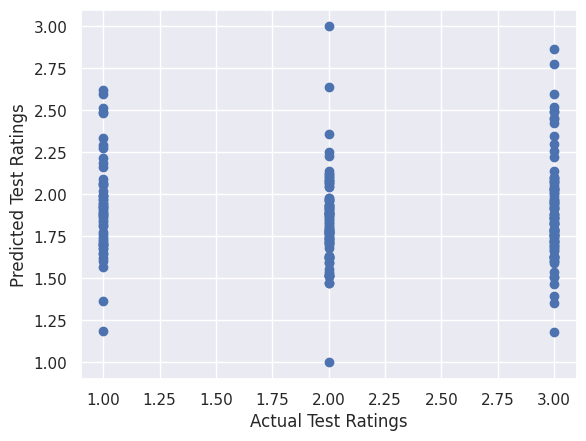

In [53]:
plt.scatter(ratingsRemoved, predictedRatingsRemoved)
plt.xlabel('Actual Test Ratings')
plt.ylabel('Predicted Test Ratings')

In [54]:
np.corrcoef(ratingsRemoved, predictedRatingsRemoved)

array([[ 1.       , -0.0149971],
       [-0.0149971,  1.       ]])

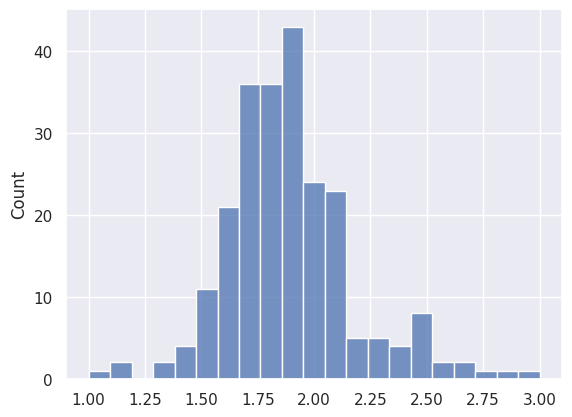

In [55]:
sns.histplot(data=predictedRatingsRemoved)
ax.set_xlabel("Predicted Restaurant Ratings")
plt.show()

**Improved Matrix Factorization**

In [56]:
# From "Recommender System - Matrix Factorization" on Medium
# (https://towardsdatascience.com/recommendation-system-matrix-factorization-d61978660b4b)
def matrix_factorization(R, P, Q, K, steps=3000, alpha=0.02, beta=0.02):
    '''
    R: rating matrix
    P: |U| * K (User features matrix)
    Q: |D| * K (Item features matrix)
    K: latent features
    steps: iterations
    alpha: learning rate
    beta: regularization parameter'''
    Q = Q.T

    for step in range(steps):
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j] > 0:
                    # calculate error
                    eij = R[i][j] - np.dot(P[i,:],Q[:,j])

                    for k in range(K):
                        # calculate gradient with a and beta parameter
                        P[i][k] = P[i][k] + alpha * (2 * eij * Q[k][j] - beta * P[i][k])
                        Q[k][j] = Q[k][j] + alpha * (2 * eij * P[i][k] - beta * Q[k][j])

        eR = np.dot(P,Q)

        e = 0

        for i in range(len(R)):

            for j in range(len(R[i])):

                if R[i][j] > 0:

                    e = e + pow(R[i][j] - np.dot(P[i,:],Q[:,j]), 2)

                    for k in range(K):

                        e = e + (beta/2) * (pow(P[i][k],2) + pow(Q[k][j],2))
        # 0.001: local minimum
        if e < 0.001:

            break

    return P, Q.T

In [57]:
R = ratings # 138x130 rating matrix
N = 138 # users
M = 130 # restaurants
K = 51 # latent factors

P = np.random.rand(N,K) # randomly generated user-latent matrix
Q = np.random.rand(M,K) # randomly generated restaurant-latent matrix

# perform the matrix factorization to get the user and restaurant latent matrices
nP, nQ = matrix_factorization(R, P, Q, K)
# calculate the new NxM matrix
nR = np.dot(nP, nQ.T)

In [58]:
# evaluate performance of model
rmseGD = math.sqrt(sklearn.metrics.mean_squared_error(R, nR))
print(rmseGD)

1.9291584998822178


In [59]:
# find out which restaurant that each user hasn't been to yet was predicted to have the highest rating
maxRatings = [] # store list of highest predicted ratings for each user
maxIndices = [] # store list of recommended restaurants for each user
# loop through each user
for user in range(0,138):
  maxRating = 0 # store the user's highest predicted rating for a restaurant
  maxIndex = 0 # store the index of the user's highest predicted restaurant
  # loop through each restaurant for that user
  for rest in range(0,130):
    # if the predicted rating is high and the user hasn't rated that restaurant
    if(nR[user,rest]>maxRating and R[user,rest]==0):
      # store the rating of that restaurant and which restaurant it is
      maxRating = nR[user,rest]
      maxIndex = rest
  # add that user's maximum predicted rating and recommended restaurant to lists
  maxRatings.append(maxRating)
  maxIndices.append(maxIndex)
# print the list of restaurants that were recommended to each user
print(maxIndices)

[119, 52, 118, 82, 38, 101, 98, 62, 101, 115, 104, 52, 101, 75, 62, 101, 101, 52, 75, 101, 101, 92, 9, 52, 101, 62, 101, 57, 98, 29, 101, 102, 101, 117, 52, 57, 43, 85, 117, 101, 62, 52, 71, 72, 119, 82, 38, 101, 52, 11, 71, 62, 29, 52, 82, 104, 101, 26, 118, 101, 83, 26, 7, 91, 101, 71, 13, 52, 32, 13, 82, 88, 82, 101, 119, 58, 52, 128, 68, 5, 101, 52, 102, 52, 119, 128, 62, 52, 101, 101, 116, 76, 82, 38, 117, 52, 104, 104, 101, 101, 104, 62, 101, 57, 31, 95, 101, 82, 62, 71, 75, 47, 78, 82, 51, 101, 57, 98, 117, 82, 71, 26, 104, 38, 91, 91, 101, 101, 92, 52, 128, 92, 29, 78, 57, 102, 101, 101]


In [60]:
# look at which restaurants were recommended the most
np.unique(restaurants[maxIndices], return_counts=True)

(array([132584, 132608, 132613, 132630, 132660, 132755, 132768, 132825,
        132830, 132854, 132866, 132875, 132921, 132922, 132955, 132958,
        134986, 135001, 135016, 135018, 135025, 135026, 135028, 135034,
        135035, 135039, 135042, 135045, 135046, 135049, 135052, 135055,
        135057, 135059, 135073, 135074, 135075, 135076, 135079, 135108]),
 array([ 1,  1,  1,  1,  2,  3,  3,  1,  1,  4,  1,  1,  1, 15,  5,  1,  8,
         1,  5,  1,  3,  1,  2,  9,  1,  1,  1,  3,  3,  1,  3, 29,  3,  6,
         1,  1,  4,  2,  4,  3]))

In [61]:
# make a dataframe where placeIDs are first column and second column is how many people got rec'd that restaurant
restRecDF2 = pd.DataFrame(data=np.unique(restaurants[maxIndices]),columns=['restID'])
restRecDF2['recd to'] = np.unique(restaurants[maxIndices],return_counts=True)[1]
# look at the 15 restaurants that were recommended first to the most people
restRecDF2.sort_values(by='recd to',ascending=False)[0:15]

,restID,recd to
31,135055,29
13,132922,15
23,135034,9
16,134986,8
33,135059,6
18,135016,5
14,132955,5
38,135079,4
36,135075,4
9,132854,4


In [62]:
# train and test the matrix using user-restaurant pairs we already have as a test set
rCopy = R.copy()
print(rCopy)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [63]:
# keep track of which ratings we removed from which users and restaurants
for ratingToRemove in ratingsToRemove:
  row = (user_ratings_df.loc[ratingToRemove][1])-1
  col = list(restaurants).index(user_ratings_df.loc[ratingToRemove][2])
  rCopy[row][col] = 0
print(len(ratingsRemoved))

232


In [64]:
# make sure that we only removed non-zero ratings
np.sum(rCopy!=0)

929

In [65]:
# re-run SVD with the 929 remaining ratings
R = rCopy # 138x130 rating matrix
N = 138 # users
M = 130 # restaurants
K = 51 # latent factors

P = np.random.rand(N,K) # randomly generated user-latent matrix
Q = np.random.rand(M,K) # randomly generated restaurant-latent matrix

# perform the matrix factorization to get the user and restaurant latent matrices
nP, nQ = matrix_factorization(R, P, Q, K)
# calculate the new NxM matrix
nR = np.dot(nP, nQ.T)

In [66]:
predictedRatingsRemoved = []
for i in np.arange(0,232):
    predictedRatingsRemoved.append(nR[usersRemoved[i]][restsRemoved[i]])
len(predictedRatingsRemoved)

232

In [67]:
# rescale predicted ratings to get them from 1 to 3
predictedRatingsRemoved = (predictedRatingsRemoved-min(predictedRatingsRemoved))/(max(predictedRatingsRemoved)-min(predictedRatingsRemoved))
predictedRatingsRemoved = (predictedRatingsRemoved*2)+1

In [68]:
# evaluate how closely the predictions match the actual ratings == RERUN
rmseNew = math.sqrt(sklearn.metrics.mean_squared_error(ratingsRemoved, predictedRatingsRemoved))
print(rmseNew)

0.7110870758418977


Text(0, 0.5, 'Predicted Test Ratings')

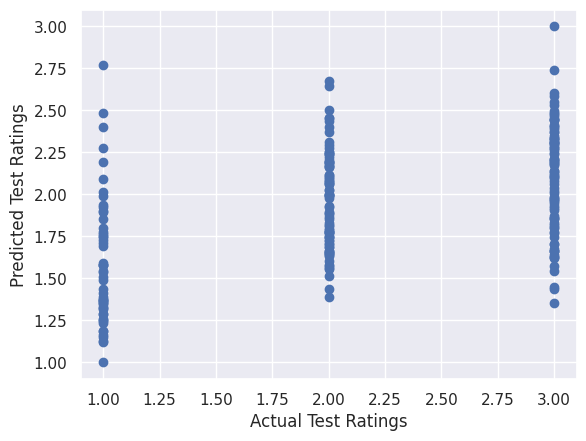

In [69]:
plt.scatter(ratingsRemoved, predictedRatingsRemoved)
plt.xlabel('Actual Test Ratings')
plt.ylabel('Predicted Test Ratings')

In [70]:
np.corrcoef(ratingsRemoved, predictedRatingsRemoved)

array([[1.        , 0.49999114],
       [0.49999114, 1.        ]])

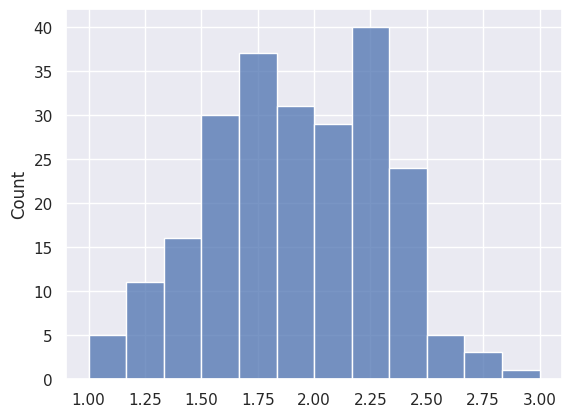

In [ ]:
sns.histplot(data=predictedRatingsRemoved)
ax.set_xlabel("Predicted Restaurant Ratings")
plt.show()